# Assignment 1

The sinking of the Titanic is one of the most infamous shipwrecks in
history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t
enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224
passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of
people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that 

answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 


Dataset link: https://www.kaggle.com/c/titanic/data


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#{"username":"jayrajs","key":"f9f0cb850b7769df922b2beab1d3552d"}
import opendatasets as od
od.download(
    "https://www.kaggle.com/c/titanic/data")


Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [ ]:
train=pd.read_csv('/content/titanic/train.csv')
test=pd.read_csv('/content/titanic/test.csv')

In [ ]:
print(train.shape)

(891, 12)


In [ ]:
print(test.shape)

(418, 11)


In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.drop(['Cabin'],inplace=True,axis=1)
test.drop(['Cabin'],inplace=True,axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train['Embarked'].fillna('S',inplace=True)


In [ ]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [ ]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [ ]:
(177/891)*100  # age null data in train 

19.865319865319865

In [ ]:
(86/418)*100  # age null data in test

20.574162679425836

In [ ]:
train_Age =np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean()+train['Age'].std(),177 )
#there are 177 valuae in the given range 

In [ ]:
train_Age

array([40, 26, 40, 23, 43, 38, 40, 24, 26, 42, 24, 34, 17, 27, 28, 40, 42,
       29, 27, 27, 30, 23, 21, 24, 24, 38, 16, 18, 39, 35, 20, 28, 20, 20,
       31, 27, 27, 16, 28, 36, 38, 28, 22, 38, 18, 42, 23, 27, 36, 27, 40,
       16, 32, 17, 18, 29, 24, 33, 32, 15, 15, 34, 20, 37, 21, 24, 20, 33,
       16, 35, 27, 27, 18, 17, 21, 20, 17, 27, 43, 33, 38, 27, 43, 42, 27,
       39, 40, 23, 37, 22, 41, 19, 20, 31, 34, 26, 25, 23, 42, 34, 30, 37,
       38, 30, 39, 15, 16, 16, 22, 27, 43, 17, 43, 32, 37, 40, 18, 34, 29,
       23, 32, 37, 31, 35, 31, 18, 24, 22, 40, 24, 24, 31, 18, 31, 43, 39,
       28, 25, 35, 18, 24, 26, 38, 43, 36, 17, 22, 43, 22, 26, 19, 42, 31,
       27, 37, 21, 21, 35, 40, 33, 23, 41, 27, 36, 43, 23, 19, 25, 36, 19,
       37, 34, 26, 34, 31, 43, 31])

In [ ]:
test_Age=np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean()+test['Age'].std(),86)

In [ ]:
test_Age

array([17, 19, 28, 35, 16, 32, 39, 41, 17, 41, 20, 23, 16, 43, 34, 34, 41,
       30, 20, 33, 21, 18, 36, 43, 34, 41, 20, 29, 33, 29, 40, 40, 32, 35,
       27, 24, 35, 42, 37, 32, 42, 43, 29, 34, 20, 41, 35, 18, 38, 19, 31,
       23, 26, 17, 21, 34, 35, 25, 37, 27, 28, 34, 23, 38, 17, 30, 24, 25,
       20, 41, 36, 22, 27, 23, 22, 23, 33, 32, 29, 34, 22, 38, 26, 36, 33,
       37])

In [ ]:
train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [ ]:
train['Age'][train['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [ ]:
train['Age'][train['Age'].isnull()].shape   # we ahev to repalce that all 177 nan 

(177,)

In [ ]:
# repalce that all nan 177 valuae with train_AGE  

train['Age'][train['Age'].isnull()]=train_Age

<ipython-input-29-3c691b59d41c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_Age


In [ ]:
train.isnull().sum()  # zero nll val 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# same thing will be applicable for test null age val

test['Age'][test['Age'].isnull()]=test_Age

<ipython-input-31-c0230ccb519e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_Age


In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

In [ ]:
train[train['Pclass']==1]['Survived'].value_counts() 

1    136
0     80
Name: Survived, dtype: int64

In [ ]:
train[train['Pclass']==2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [ ]:
train[train['Pclass']==3]['Survived'].value_counts() 

0    372
1    119
Name: Survived, dtype: int64

In [ ]:
train.groupby(['Pclass'])['Survived'].mean()    

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
train.groupby(['Sex'])['Survived'].mean()  

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
train.groupby(['Embarked'])['Survived'].mean()  

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

<ipython-input-39-b2bc13f9cf9e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age']) # probability density function


<Axes: xlabel='Age', ylabel='Density'>

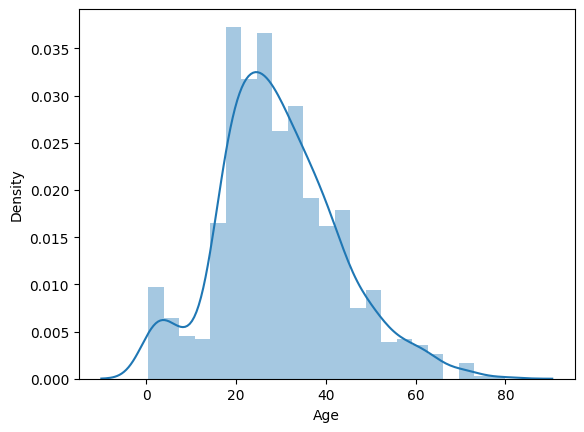

In [ ]:
sns.distplot(train['Age']) # probability density function 

<ipython-input-40-c9105ed73dab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])


<Axes: xlabel='Age', ylabel='Density'>

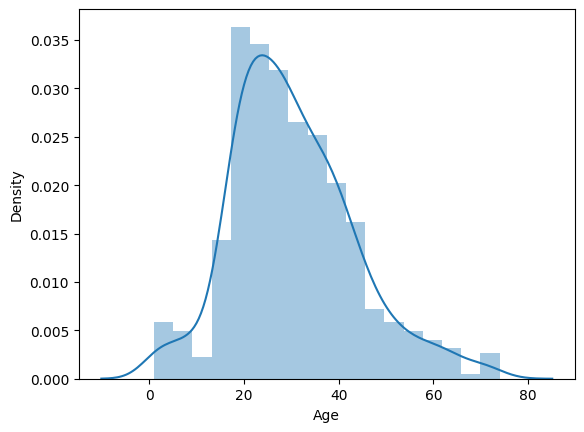

In [ ]:
sns.distplot(train['Age'][train['Survived']==0])

<ipython-input-41-14247bb13119>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

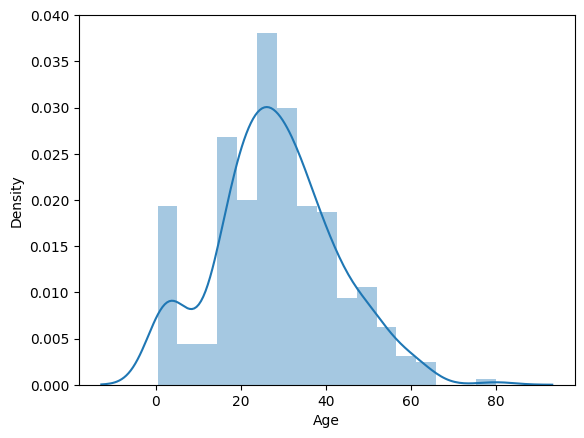

In [ ]:
sns.distplot(train['Age'][train['Survived']==1])

<ipython-input-42-443721a2379a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])# death
<ipython-input-42-443721a2379a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])# survived


<Axes: xlabel='Age', ylabel='Density'>

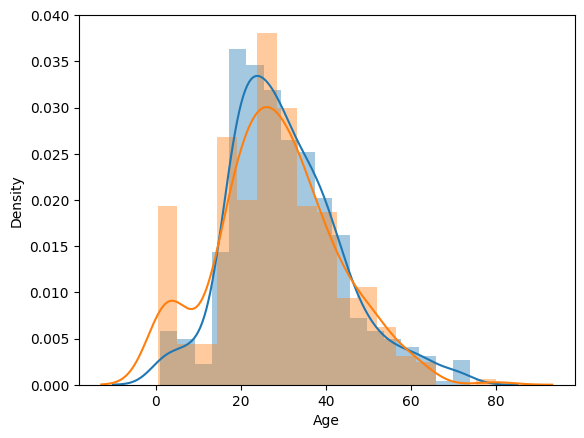

In [ ]:
sns.distplot(train['Age'][train['Survived']==0])# death 
sns.distplot(train['Age'][train['Survived']==1])# survived

<ipython-input-43-75b056aa5fd0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])# death
<ipython-input-43-75b056aa5fd0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==1])# survived


<Axes: xlabel='Fare', ylabel='Density'>

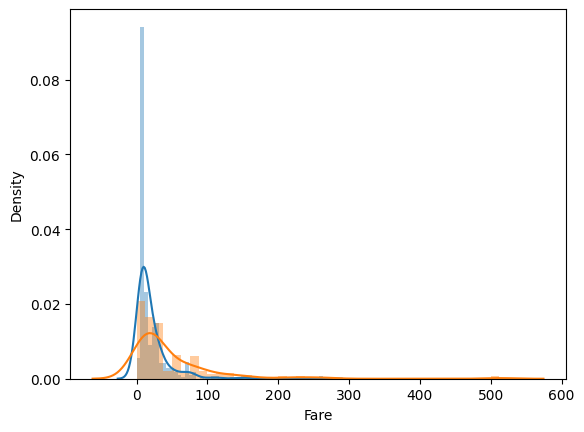

In [ ]:
sns.distplot(train['Fare'][train['Survived']==0])# death 
sns.distplot(train['Fare'][train['Survived']==1])# survived

In [ ]:
# ticket columns is not imp interm of survived 
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)     

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train['family']=train['SibSp']+train['Parch']+1

In [ ]:
train['family'].value_counts()  

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [ ]:
train.groupby(['family'])['Survived'].mean()  

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [ ]:
# for testing 

In [ ]:
test['family']=test['SibSp']+test['Parch']+1

In [ ]:
test['family'].value_counts()  

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: family, dtype: int64

In [ ]:
def cal(number):
  if number==1:
    return "Alone"
  elif number>1 and number<5:
    return "Medium"
  else:
    return "Large"

In [ ]:
train['Family_size']=train['family'].apply(cal)  #every time form family one val will go in call func

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium


In [ ]:
test['Family_size']=test['family'].apply(cal)

In [ ]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium


In [ ]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)  # they are not imp now 

In [ ]:
test.drop(columns=['SibSp','Parch','family'],inplace=True)    # they are not imp now 

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [ ]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [ ]:
passenger_id= test['PassengerId'].values

In [ ]:
passenger_name=test['Name'].values

In [ ]:
train.drop(columns=['PassengerId','Name'],inplace=True)
test.drop(columns=['PassengerId','Name'],inplace=True)

In [ ]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   Family_size  891 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


In [ ]:
train.shape

(891, 7)

In [ ]:
test.shape

(418, 6)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    object 
 5   Family_size  418 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 19.7+ KB


In [ ]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Family_size
0,3,male,34.5,7.8292,Q,Alone
1,3,female,47.0,7.0000,S,Medium
2,2,male,62.0,9.6875,Q,Alone
3,3,male,27.0,8.6625,S,Alone
4,3,female,22.0,12.2875,S,Medium


In [ ]:
# train =pd.get_dummies(train,columns=['Pclass','Sex','Age','Family_size'],drop_first=True)  # it require 3 thing 

In [ ]:
# test=pd.get_dummies(test,columns=['Pclass','Sex','Age','Family_size'],drop_first=True)  

In [ ]:
object_col_train=(train.select_dtypes(include=['object']).columns)

In [ ]:
object_col_train

Index(['Sex', 'Embarked', 'Family_size'], dtype='object')

In [ ]:
object_col_test=(train.select_dtypes(include=['object']).columns)

In [ ]:
object_col_test

Index(['Sex', 'Embarked', 'Family_size'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# treating  all object col in loop for converting labelencoder 

In [ ]:
# for train data 
label_encoder = LabelEncoder()
for col in object_col_train:
    train[col] = label_encoder.fit_transform(train[col])

In [ ]:
## for test data 
label_encoder = LabelEncoder()
for col in object_col_test:
    test[col] = label_encoder.fit_transform(test[col])

In [ ]:
train.shape

(891, 7)

In [ ]:
test.shape

(418, 6)

In [ ]:
X= train.iloc[ : ,1: ].values
y= train.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,y , test_size=0.2,random_state=41)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rcls = RandomForestClassifier(criterion='entropy', n_estimators = 150)
rcls.fit(x_train,y_train)
ypred=rcls.predict(x_test)
acc=accuracy_score(ypred,y_test)

print(f"Accuracy from RF is:{acc}")

Accuracy from RF is:0.7821229050279329


In [ ]:
Xff=test.iloc[:,:].values

In [ ]:
y_final =rcls.predict(Xff)

In [ ]:
y_final.shape

(418,)

In [ ]:
passenger_id.shape

(418,)

In [ ]:
# we will make empty data set 

In [ ]:
final=pd.DataFrame()

In [ ]:
final

""


In [ ]:
final['passenger_id']=passenger_id
final['passenger_name']=passenger_name
final['Survived']=y_final


In [ ]:
final

,passenger_id,passenger_name,Survived
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...,...
413,1305,"Spector, Mr. Woolf",0
414,1306,"Oliva y Ocana, Dona. Fermina",1
415,1307,"Saether, Mr. Simon Sivertsen",0
416,1308,"Ware, Mr. Frederick",0


# Assignment 2

Create a model to perform binary classification between horse and
human images using convolutional neural networks.

Dataset available in Tensorflow datasets

Please copy and paste the Dataset Link


In [ ]:
# {"username":"jayrajs","key":"8cf4ff02da01ddae5ab4198a2697b90f"}

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:

# Load the dataset
dataset_name = 'horses_or_humans'
(train_data, validation_data), info = tfds.load(dataset_name, split=['train', 'test'], with_info=True, as_supervised=True)



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteXJLIE4/horses_or_humans-train.tfrecord*..…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteXJLIE4/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [3]:
# Get the class names
class_names = np.array(info.features['label'].names)
print(class_names)

['horses' 'humans']


#### to see the data images randomly to chek whre the images is horse or human

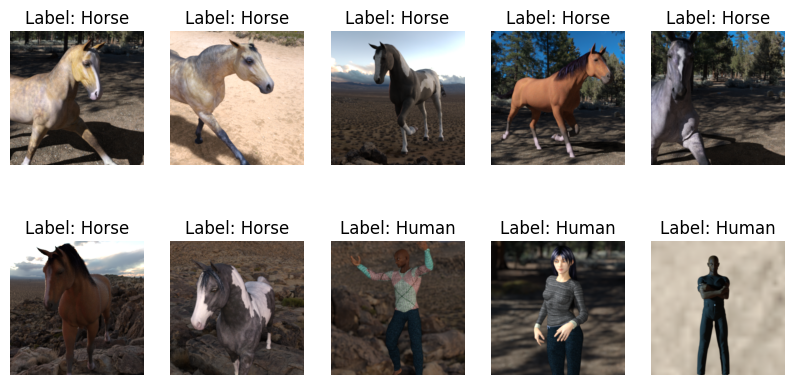

In [4]:
import matplotlib.pyplot as plt
import random

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,5))

for i, (image, label) in enumerate(train_data.take(10)):
    ax = axes[i//5, i%5]
    ax.imshow(image.numpy())
    ax.set_title("Label: {}".format("Horse" if label.numpy() == 0 else "Human"))
    ax.axis("off")

plt.show()


In [5]:
train_data, validation_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [6]:
img_height = 300
img_width = 300
batch_size = 32

# Resize the images
train_data = train_data.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))
validation_data = validation_data.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))


# Normalize the pixel values
train_data = train_data.map(lambda x, y: (x/255.0, y))
validation_data = validation_data.map(lambda x, y: (x/255.0, y))


#### creating model 

In [8]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
epochs = 10
history = model.fit(train_data.batch(batch_size), epochs=epochs, validation_data=validation_data.batch(batch_size))

Epoch 1/10
33/33 [==============================] - 160s 5s/step - loss: 0.4120 - accuracy: 0.8169 - val_loss: 1.2622 - val_accuracy: 0.8203
Epoch 2/10
33/33 [==============================] - 130s 4s/step - loss: 0.1444 - accuracy: 0.9474 - val_loss: 1.6595 - val_accuracy: 0.8086
Epoch 3/10
33/33 [==============================] - 137s 4s/step - loss: 0.0557 - accuracy: 0.9815 - val_loss: 1.6687 - val_accuracy: 0.8320
Epoch 4/10
33/33 [==============================] - 132s 4s/step - loss: 0.0568 - accuracy: 0.9834 - val_loss: 1.1383 - val_accuracy: 0.8477
Epoch 5/10
33/33 [==============================] - 132s 4s/step - loss: 0.0508 - accuracy: 0.9796 - val_loss: 3.1245 - val_accuracy: 0.7930
Epoch 6/10
33/33 [==============================] - 132s 4s/step - loss: 0.0723 - accuracy: 0.9757 - val_loss: 3.3597 - val_accuracy: 0.7617
Epoch 7/10
33/33 [==============================] - 133s 4s/step - loss: 0.0157 - accuracy: 0.9922 - val_loss: 2.4337 - val_accuracy: 0.8281
Epoch 8/10
33

In [12]:
import matplotlib.pyplot as plt

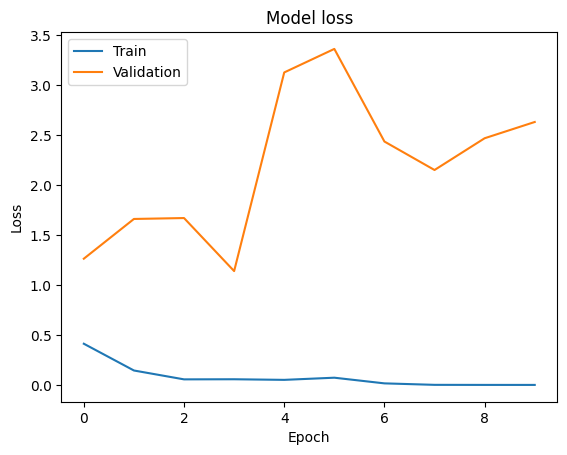

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


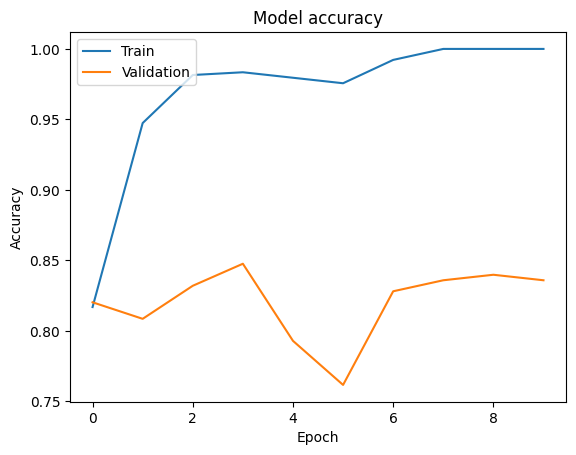

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [23]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import random

In [31]:

# Choose a random image from the training set
image, label = random.choice(list(train_data.as_numpy_iterator()))


In [32]:
# Preprocess the image
img_height, img_width = 300, 300
image = tf.image.resize(image, (img_height, img_width))
image = tf.cast(image, tf.float32) / 255.0
image = tf.expand_dims(image, axis=0)


In [33]:

prediction = model.predict(image)
class_names = ['horse', 'human']
predicted_class = class_names[int(prediction[0][0])]

1/1 [==============================] - 0s 60ms/step


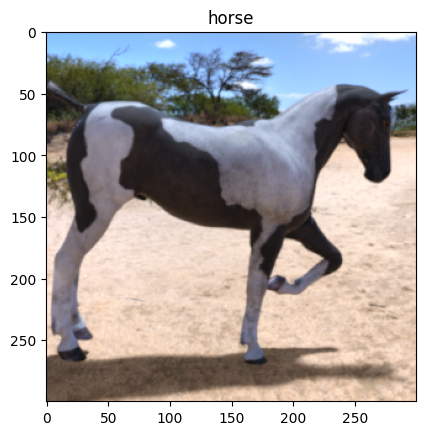

In [34]:

plt.imshow(image[0])
plt.title(predicted_class)
plt.show()

In [35]:

predicted_class = class_names[np.argmax(predicted_class)]

In [36]:

# Print the predicted class
print("Predicted class:", predicted_class)

Predicted class: horse
